## Business Understanding:


  - **Problem:** Predicting whether a patient has sepsis.
  - **Goal:** Develop a machine learning model that can accurately predict sepsis based on patient information.
  - **Machine Learning Suitability:** Machine learning is a suitable approach for this problem, as it involves classification (positive/negative) based on various features.





### Features


- **PRG (Pregnancy):** Number of pregnancies the patient has had.
- **PL (Glucose concentration):** Plasma glucose concentration after 2 hours in an oral glucose tolerance test.
- **PR (Blood pressure):** Diastolic blood pressure (mm Hg).
- **SK (Skin thickness):** Triceps skinfold thickness (mm).
- **TS (Insulin level):** 2-hour serum insulin (mu U/ml).
- **M11 (BMI):** Body mass index (weight in kg/(height in m)^2).
- **BD2 (Diabetes pedigree function):** Diabetes pedigree function.
- **Age:** Age of the patient.
- **Insurance:** Whether the patient has insurance (0 for no, 1 for yes).
- **Sepssis:** Presence of sepsis (Positive or Negative).




## Data Understanding:

  - **Dataset Overview:** The sample data includes patient IDs and various features such as pregnancy (PRG), glucose concentration (PL), blood pressure (PR), skin thickness (SK), insulin level (TS), BMI (M11), diabetes pedigree function (BD2), age, insurance status, and the presence of sepsis.
  - **Data Quality:** No obvious issues are apparent in the sample data, but a more thorough analysis would be needed to check for missing values, outliers, or inconsistencies.
  - **Target Variable:** The target variable is the presence of sepsis, which is labeled as "Positive" or "Negative" in the dataset.

## Importations

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, FunctionTransformer, LabelEncoder
from sklearn.svm import  SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier 
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.over_sampling import SMOTE
import joblib


In [33]:


# Load the training dataset
train_data = pd.read_csv("Paitients_Files_Train.csv")

# Load the test dataset
test_data = pd.read_csv("Paitients_Files_Test.csv")

# Check the size and structure of the training dataset
print("Training dataset shape:", train_data.shape)
print("Training dataset columns:", train_data.columns)

print(f"{'=' * 50}")

# Check the size and structure of the test dataset
print("Test dataset shape:", test_data.shape)
print("Test dataset columns:", test_data.columns)



Training dataset shape: (599, 11)
Training dataset columns: Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')
Test dataset shape: (169, 10)
Test dataset columns: Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')


In [34]:
type(train_data)

pandas.core.frame.DataFrame

## EDA

In [35]:
test_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


In [36]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [37]:
train_data.duplicated().sum()

0

In [38]:
test_data.duplicated().sum()

0

In [39]:
#Describe the Train dataset

train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


In [40]:
#Describe the Test dataset

test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,169.0,3.917160,3.402415,0.0,1.000,3.000,6.000,13.000
PL,169.0,123.520710,29.259123,56.0,102.000,120.000,141.000,199.000
PR,169.0,70.426036,19.426805,0.0,62.000,74.000,80.000,114.000
SK,169.0,20.443787,15.764962,0.0,0.000,23.000,32.000,49.000
TS,169.0,81.000000,110.720852,0.0,0.000,0.000,135.000,540.000
M11,169.0,32.249704,7.444886,0.0,27.600,32.400,36.600,57.300
BD2,169.0,0.438876,0.306935,0.1,0.223,0.343,0.587,1.698
Age,169.0,33.065089,11.548110,21.0,24.000,28.000,42.000,70.000
Insurance,169.0,0.727811,0.446410,0.0,0.000,1.000,1.000,1.000


## Univariate Analyisis

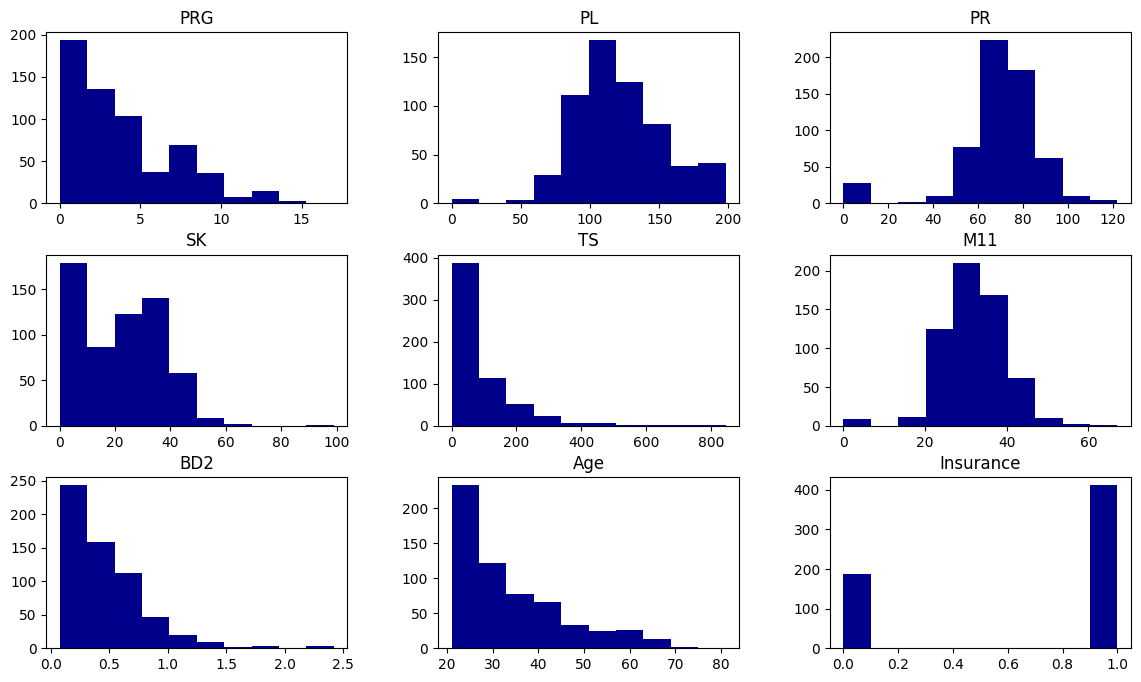

In [41]:
train_data.hist(figsize=(14, 8), color="darkblue", grid=False)
plt.show()

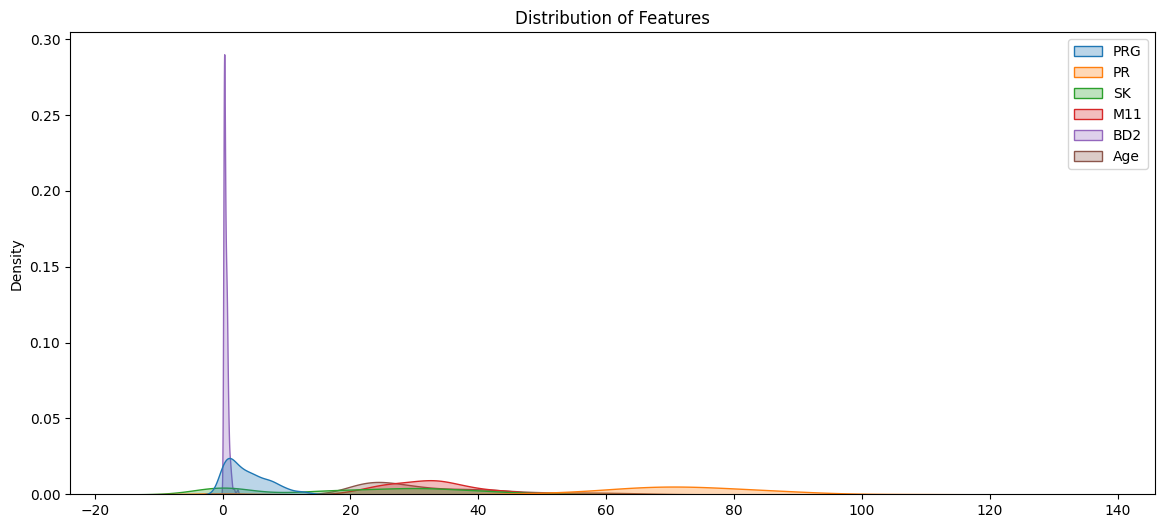

In [42]:
plt.figure(figsize=(14,6), )
sns.kdeplot(train_data.drop(['TS', 'Insurance', 'PL'], axis=1), fill = True, alpha=0.3)
plt.title('Distribution of Features')
plt.show()

<Axes: ylabel='Density'>

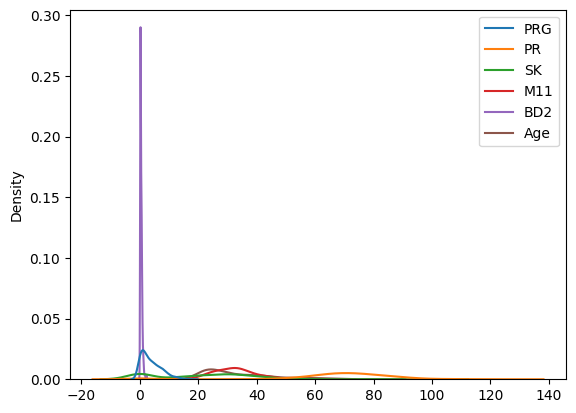

In [43]:
sns.kdeplot(train_data.drop(['TS', 'Insurance', 'PL'], axis=1))

### Check for Outliers 



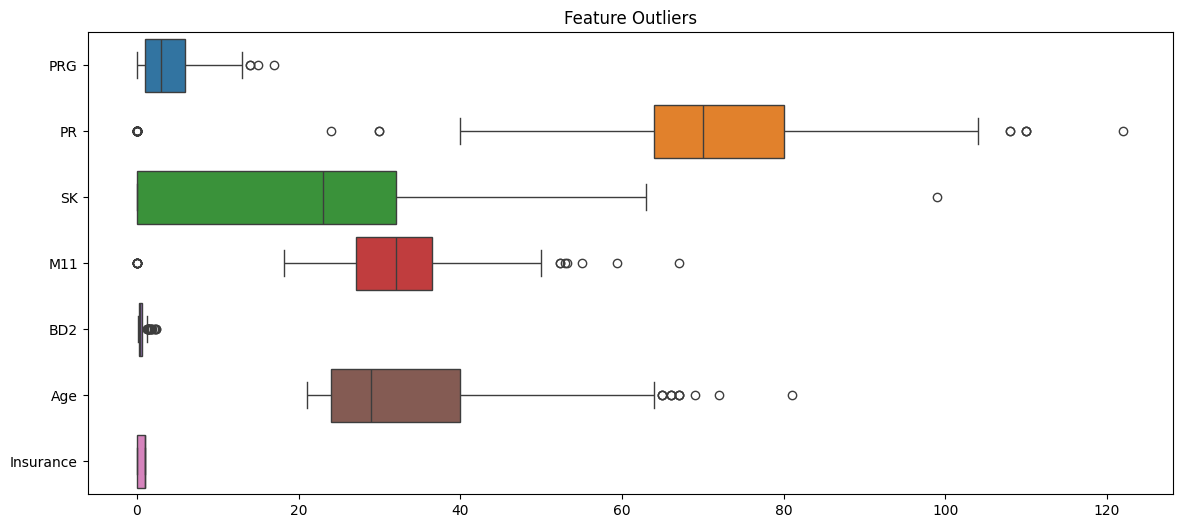

In [44]:
plt.figure(figsize=(14,6))
sns.boxplot(train_data.drop(['TS', 'PL'], axis=1), orient='h')
plt.title('Feature Outliers')
plt.show()


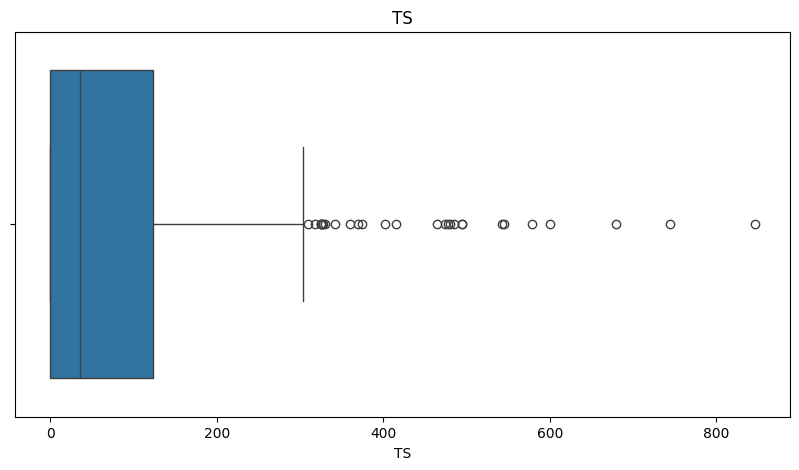

In [45]:
plt.figure(figsize=(10,5))
sns.boxplot(train_data['TS'], orient='h')
plt.title('TS')
plt.show()

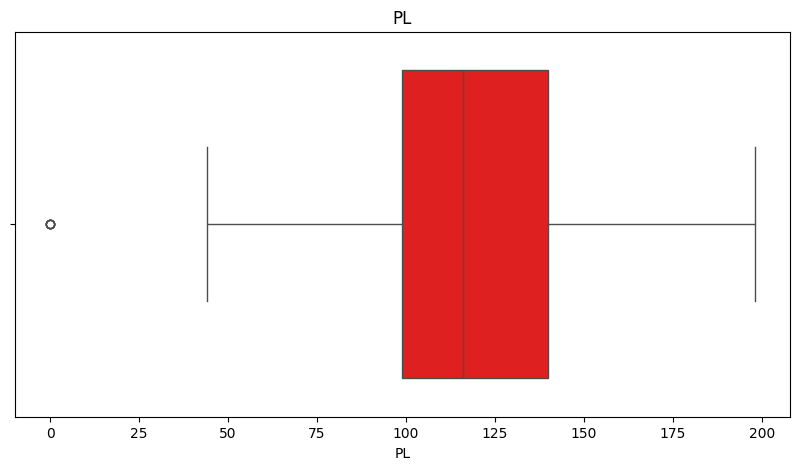

In [46]:
plt.figure(figsize=(10,5))
sns.boxplot(train_data['PL'], orient='h', color='red')
plt.title('PL')
plt.show()

## Bi-Vairate Analysis

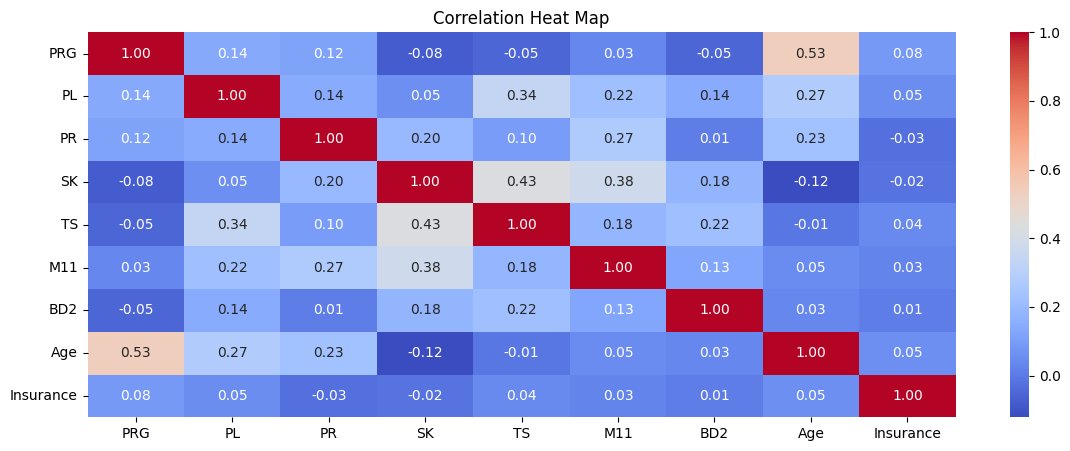

In [47]:
plt.figure(figsize=(14,5))
orrelation_matrix = train_data.drop((['Sepssis', 'ID']), axis=1).corr()
sns.heatmap(orrelation_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heat Map')
plt.show()

# Data Preparation

In [48]:
train_data['Sepssis'].value_counts()

Sepssis
Negative    391
Positive    208
Name: count, dtype: int64

In [49]:

X = train_data.drop(columns=['Sepssis'])
y = train_data['Sepssis']

In [50]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


### Encode your Target label

In [51]:
encoder = LabelEncoder()
y_train_encoder = encoder.fit_transform(y_train)
y_test_encoder = encoder.transform(y_test)

## Create a Preprocessor

In [52]:
# Define the columns to be used in the preprocessor
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(transformers=[
    ('impute', SimpleImputer(strategy='median'), numeric_features),
    ('scaler', RobustScaler(), numeric_features),
    ('log_transformation', FunctionTransformer(np.log1p), numeric_features)
])


# Modelling & Evaluation

In [53]:
models = [
    ('svc', SVC(probability=True, random_state=42)),
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('gradirnt_booster', GradientBoostingClassifier(random_state=42)),
    ('stochastic_gradient', SGDClassifier(random_state=42))
]

#### Train Models in loop 

In [54]:
# Table to store metrics
results_table = pd.DataFrame(columns=['Model Name', 'Precision', 'Recall', 'Accuracy', 'F1_Score'])

# Store the pipeline
all_pipelines = {}

# Loop through the models to train and get scores
for model_name, classifier in models:

    # Define the pipeline for each model
    pipeline = Pipeline(steps=[
        ('preprocessors', preprocessor),
        ('feature_importance', SelectKBest(mutual_info_classif, k='all')),
        ('classifier', classifier)
    ])

    # Fit the training data
    pipeline.fit(X_train, y_train_encoder)

    # Make predictions using test data
    y_pred = pipeline.predict(X_test)

    # Store classification report 
    metrics = classification_report(y_test_encoder, y_pred, output_dict=True)

    # Save each pipeline in the loop to the dictionary 
    all_pipelines[model_name] = pipeline

    # Grab values in the balanced metric
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1 = metrics['weighted avg']['f1-score']

    # Adding them to the table
    results_table.loc[len(results_table)] = [model_name, precision, recall, accuracy, f1]

# Sort table
results_table.sort_values('F1_Score', ascending=False)


,Model Name,Precision,Recall,Accuracy,F1_Score
1,random_forest,0.732528,0.740000,0.740000,0.733392
2,gradirnt_booster,0.717330,0.726667,0.726667,0.717764
3,stochastic_gradient,0.703848,0.713333,0.713333,0.684189
0,svc,0.673982,0.686667,0.686667,0.676461


In [55]:
#View models 
all_pipelines['gradirnt_booster']

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('impute',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                 ('scaler', RobustScaler(),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                 ('log_transformation',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('feature_importance',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x0000025DF14B6C00>)),
                ('classifier', GradientBoostingClassifier(random_state=42))])

## Train on Balanced Dataset

In [58]:
# Table to store metrics
balance_data_metric_table = pd.DataFrame(columns=['Model Name', 'Precision', 'Recall', 'Accuracy', 'F1_Score'])

# Store the pipeline
balanced_pipelines = {}

# Loop through the models to train and get scores
for model_name, classifier in models:

    # Define the pipeline for each model
    pipeline = imbPipeline(steps=[
        ('preprocessors', preprocessor),
        ('smote',SMOTE(sampling_strategy='auto')),
        ('feature_importance', SelectKBest(mutual_info_classif, k='all')),
        ('classifier', classifier)
    ])

    # Fit the training data
    pipeline.fit(X_train, y_train_encoder)

    # Make predictions using test data
    y_pred = pipeline.predict(X_test)

    # Store classification report 
    balanced_metrics = classification_report(y_test_encoder, y_pred, output_dict=True)

    # Save each pipeline in the loop to the dictionary 
    balanced_pipelines[model_name] = pipeline

    # Grab values in the balanced metric
    accuracy = balanced_metrics['accuracy']
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1 = balanced_metrics['weighted avg']['f1-score']

    # Adding them to the table
    balance_data_metric_table.loc[len(balance_data_metric_table)] = [model_name, precision, recall, accuracy, f1]

# Sort table
balance_data_metric_table.sort_values('F1_Score', ascending=False)


,Model Name,Precision,Recall,Accuracy,F1_Score
3,stochastic_gradient,0.741215,0.746667,0.746667,0.742674
2,gradirnt_booster,0.730667,0.726667,0.726667,0.728374
1,random_forest,0.715647,0.706667,0.706667,0.710035
0,svc,0.722353,0.700000,0.700000,0.706011


## Persist Model

In [61]:
import os

# Create the models directory if it doesn't exist
os.makedirs('../models/', exist_ok=True)

# Now you can save the pipeline
for model_name, pipeline in all_pipelines.items():
    joblib.dump(pipeline, f'../models/{model_name}_pipeline.pkl')

# Also, save the encoder
joblib.dump(encoder, 'label_encoder.pkl')


['label_encoder.pkl']

## Multivariate Analysis

# Key Insights 

### 1. Null Values:
   - There are no null values in any of the columns (all columns have 599 non-null entries).

### 2. Feature Scale:
   - Features are on different scales, e.g., "Pregnancy" ranges from 0 to 17, while "2-hour serum insulin" ranges from 0 to 846.
   - Consider scaling features to a similar range before training machine learning models.

### 3. Distribution:
   - The distribution of features varies, with some having narrow distributions (e.g., "Pregnancy") and others wider distributions with potentially more outliers (e.g., "2-hour serum insulin").
   - Visualize feature distributions to understand their characteristics and identify outliers or skewness.

### 4. Outliers:
   - There are some outliers present in some features. Identify and possibly remove outliers to improve model performance.

### 5. Data:
  -The dataset is not balance   it is also positivly 

